# Second Level EDA

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix


In [43]:
data=pd.read_csv(r'C:\Users\asus\Documents\Projects\Question_Similarity_Pairs\Input\preprocessed_data.csv')
data.head(5)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate
0,0,0,1,2,step step guid invest share market india,step step guid invest share market,0
1,1,1,3,4,stori kohinoor kohinoor diamond,would happen indian govern stole kohinoor kohi...,0
2,2,2,5,6,increa speed internet connect use vpn,internet speed increa hack dn,0
3,3,3,7,8,mentawiwilli lone solv,find remaind math2324math divid 2423,0
4,4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0


In [73]:
data.shape

(404153, 12)

Let's try to compute our accuracy on this pre-processed data

In [44]:
data.dropna(axis=0,subset=['question1','question2'],how='any',inplace=True)


In [45]:
cv=CountVectorizer(max_features=30)
q1_list=data['question1'].tolist()
q2_list=data['question2'].tolist()
tot_list=q1_list+q2_list
len(tot_list)

808306

In [46]:

q1,q2=np.vsplit(cv.fit_transform(tot_list).toarray(),2)
q1_df=pd.DataFrame(q1,index=data.index)
q2_df=pd.DataFrame(q2,index=data.index)
final_df=pd.concat([q1_df,q2_df],axis=1)
final_df.shape



(404153, 60)

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(final_df,data['is_duplicate'],test_size=0.2,stratify=data['is_duplicate'],random_state=24)

In [48]:
model=LogisticRegression()
model.fit(X_train,Y_train)



LogisticRegression()

In [49]:
train_score=accuracy_score(Y_train,model.predict(X_train))
test_score=accuracy_score(Y_test,model.predict(X_test))
print("Train Score=",train_score)
print("Test Score=",test_score)

Train Score= 0.6508774534365122
Test Score= 0.6520270688226052


In [50]:
rf_model=RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train,Y_train)



RandomForestClassifier(n_estimators=20)

In [51]:
train_score=accuracy_score(Y_train,rf_model.predict(X_train))
test_score=accuracy_score(Y_test,rf_model.predict(X_test))
print("Train Score=",train_score)
print("Test Score=",test_score)

Train Score= 0.6976605365548896
Test Score= 0.6780690576635202


### Observation
* We observe that we've removed the issue of overfitting here by using some basic pre-processing
* However the accuracy is still poor and we need to improve it using some form of feature engineering
* By using ensemble technique we're able to get a better result

### Now let's do some basic level of featurization

<h5> The basic features are as below:</h5>

* <b>len_ques1:</b> Total characters in question 1
* <b>len_ques2:</b> Total characters in question 2
* <b>q1_wordcount:</b> Count of words in question 1
* <b>q2_wordcount:</b> Count of words in question 2
* <b>word_share:</b> Common words between question 1 and question 2



In [52]:
#Creating len_ques1 and len_ques2
data['len_ques1']=data['question1'].apply(len)
data['len_ques2']=data['question2'].apply(len)

In [53]:
#Creating q1_wordcount and q2_wordcount
data['q1_wordcount']=data['question1'].apply(lambda x:len(x.split(' ')))
data['q2_wordcount']=data['question2'].apply(lambda x:len(x.split(' ')))

In [54]:
#Creating word_share 
def common_word(x,y):
    lst=[i for i in x.split(' ') if i in y.split(' ')]
    return len(lst)
data['word_share']=data[['question1','question2']].apply(lambda x:common_word(*x),axis=1)


In [55]:
data.head(5)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,len_ques1,len_ques2,q1_wordcount,q2_wordcount,word_share
0,0,0,1,2,step step guid invest share market india,step step guid invest share market,0,40,34,7,6,6
1,1,1,3,4,stori kohinoor kohinoor diamond,would happen indian govern stole kohinoor kohi...,0,31,63,4,9,3
2,2,2,5,6,increa speed internet connect use vpn,internet speed increa hack dn,0,37,29,6,5,3
3,3,3,7,8,mentawiwilli lone solv,find remaind math2324math divid 2423,0,22,36,3,5,0
4,4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0,57,28,10,5,2


### Plotting PDFs for basic features

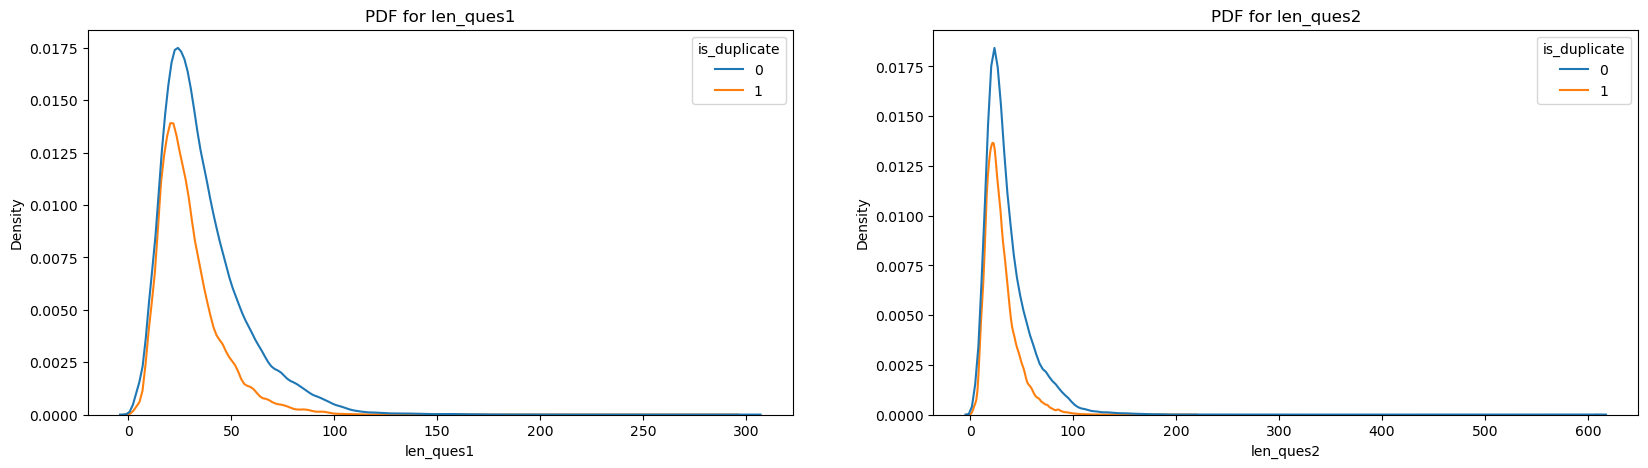

In [56]:
#Pdf for len_ques1 and len_ques2
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax[0].title.set_text('PDF for len_ques1')
ax[1].title.set_text('PDF for len_ques2')
sns.kdeplot(data,x='len_ques1',hue='is_duplicate',ax=ax[0])
sns.kdeplot(data,x='len_ques2',hue='is_duplicate',ax=ax[1])
plt.show()


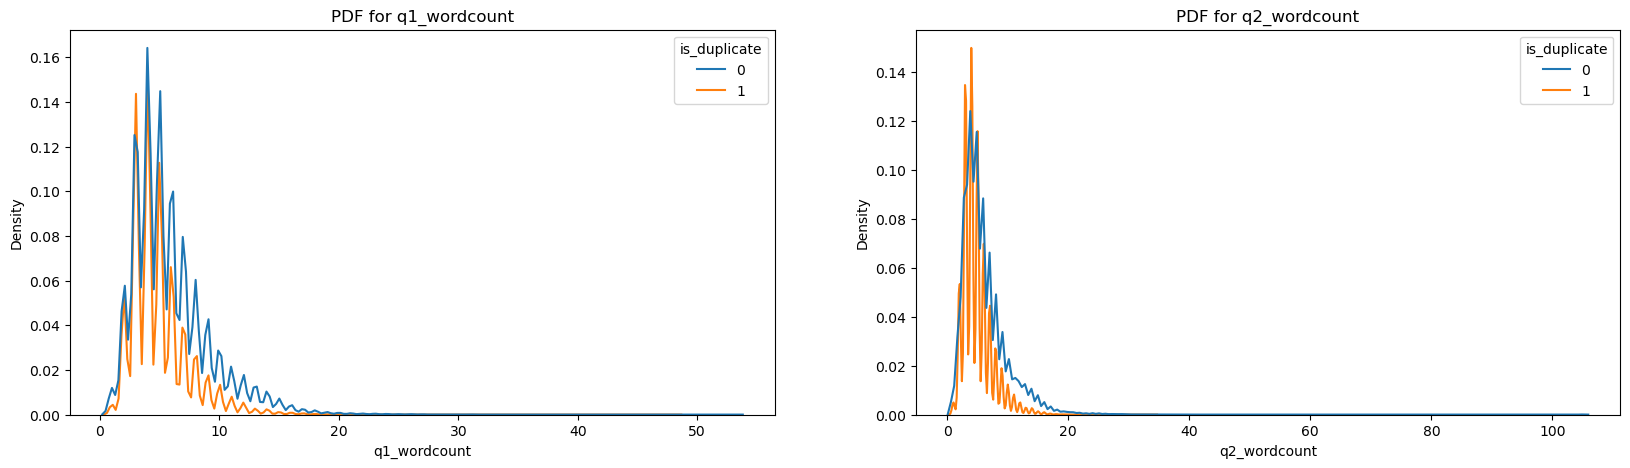

In [57]:
#PDF for q1_wordcount and q2_wordcount
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax[0].title.set_text('PDF for q1_wordcount')
ax[1].title.set_text('PDF for q2_wordcount')
sns.kdeplot(data,x='q1_wordcount',hue='is_duplicate',ax=ax[0])
sns.kdeplot(data,x='q2_wordcount',hue='is_duplicate',ax=ax[1])
plt.show()


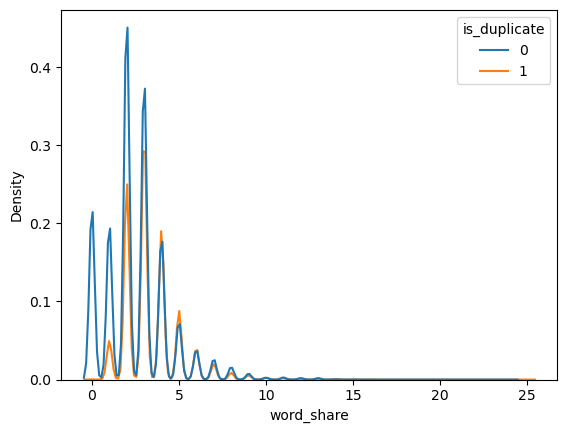

In [58]:
#PDF for wordshare
sns.kdeplot(data,x='word_share',hue='is_duplicate')
plt.show()

In [59]:
ques_list=list(data['question1'])+list(data['question2'])
q1,q2=np.vsplit(cv.fit_transform(ques_list).toarray(),2)
ques_1=pd.DataFrame(q1,index=data.index)
ques_2=pd.DataFrame(q2,index=data.index)
tot_list=pd.concat([ques_1,ques_2],axis=1)
tot_list.shape

(404153, 60)

In [60]:
temp_df=data[['is_duplicate','len_ques1','len_ques2','q1_wordcount','q2_wordcount','word_share']]
fin_df=pd.concat([temp_df,tot_list],axis=1)
fin_df.shape

(404153, 66)

In [61]:
X,Y=fin_df.drop('is_duplicate',axis=1),fin_df['is_duplicate']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)


In [62]:
import warnings
warnings.filterwarnings('ignore')
lr=LogisticRegression()
lr.fit(X_train,Y_train)
#Calcuate train accuracy
print("Train accuracy ",accuracy_score(Y_train,lr.predict(X_train)))
#Calculate test accuracy
print("Test accuracy ",accuracy_score(Y_test,lr.predict(X_test)))


Train accuracy  0.6935686405502873
Test accuracy  0.6914673825636204


In [63]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
#Calculate train accuracy
print("Train accuracy: ",accuracy_score(Y_train,rf.predict(X_train)))
#Calculate test accuracy
print("Test accuracy: ",accuracy_score(Y_test,rf.predict(X_test)))

Train accuracy:  0.908147295884598
Test accuracy:  0.745295740495602


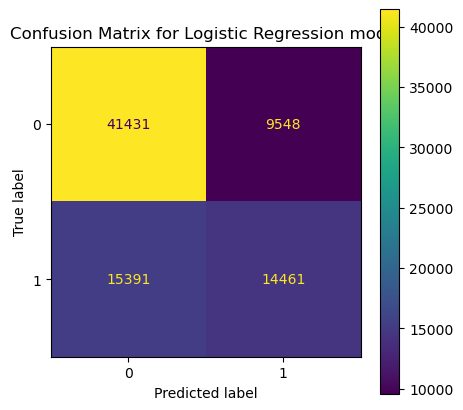

In [72]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
fig,ax=plt.subplots(figsize=(5,5))
plot_confusion_matrix(lr,X_test,Y_test,ax=ax)
ax.set_title("Confusion Matrix for Logistic Regression model")
plt.show()

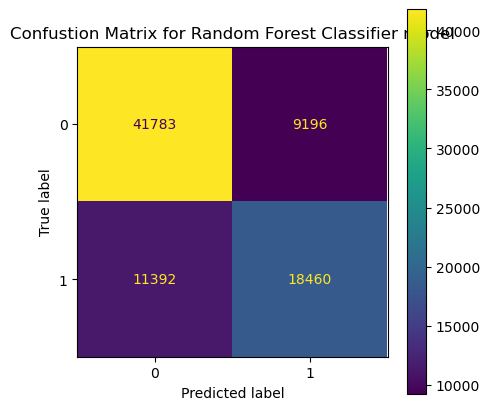

In [70]:
fig,ax=plt.subplots(figsize=(5,5))
plot_confusion_matrix(rf,X_test,Y_test,ax=ax)
plt.title("Confustion Matrix for Random Forest Classifier model")
plt.show()

##### Observations:
* Since as per this problem statement <b>False Positive</b> is a critical category that we want to avoid and as per the above graph Random Forest Classifier model is the one which is giving lesser number of <b>False Positives</b>
* But we can see that there's a slight of overfitting 